In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
def plot_binary_scatter(
    df,
    x_axis_description="Take off distance",
    y_axis_description="Jump Status (0 or 1)",
    title="Jump Outcomes from Game Observations"
):
    """
    Blog-friendly scatter plot for binary classification data.

    Assumptions:
    - df.iloc[:, 0] -> X values
    - df.iloc[:, 1] -> Binary class (0 or 1)
    """

    x = df.iloc[:, 0]
    y = df.iloc[:, 1]

    plt.figure(figsize=(10, 5), dpi=150)

    # Class 0 (downward triangle)
    plt.scatter(
        x[y == 0],
        y[y == 0],
        marker="v",              # downward triangle
        s=80,
        color="#4C72B0",
        alpha=0.75,
        edgecolors="white",
        linewidth=0.9,
        label="Jump failed"
    )

    # Class 1 (upward triangle)
    plt.scatter(
        x[y == 1],
        y[y == 1],
        marker="^",              # upward triangle
        s=80,
        color="#DD8452",
        alpha=0.75,
        edgecolors="white",
        linewidth=0.9,
        label="Jump successful"
    )

    # Title & labels
    plt.title(title, fontsize=18, weight="bold", pad=14)
    plt.xlabel(x_axis_description, fontsize=13, labelpad=10)
    plt.ylabel(y_axis_description, fontsize=13, labelpad=10)

    # Binary y-axis formatting
    plt.yticks([0, 1], ["0", "1"], fontsize=11)
    plt.xticks(fontsize=11)

    # Subtle grid
    plt.grid(
        True,
        linestyle="--",
        linewidth=0.6,
        alpha=0.3
    )

    # Clean blog-style frame
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_alpha(0.4)
    ax.spines["bottom"].set_alpha(0.4)

    # Legend
    plt.legend(frameon=False, fontsize=11, loc="upper right")

    plt.tight_layout()
    plt.show()


In [3]:
dataset_path = "../observations.csv"
take_off_distance = "take_off_distance"
jump_status = "jump_status"

observations = pd.read_csv(dataset_path)
observations = observations[observations[take_off_distance] >= 0]

observations = observations.drop_duplicates(subset=[take_off_distance])

In [4]:
observations.head()

,take_off_distance,jump_status
0,47.0,1
1,135.0,1
4,199.0,1
5,111.0,1
9,127.0,1


In [15]:
n = 3

jump_failed_observations = observations[observations[jump_status] == 0].sample(n)
jump_success_observations = observations[observations[jump_status] == 1].sample(n)

sample_observations = pd.concat([jump_failed_observations, jump_success_observations])

In [21]:
sample_observations

,take_off_distance,jump_status
144,239.0,0
220,311.0,0
12,255.0,0
4,199.0,1
1,135.0,1
5,111.0,1


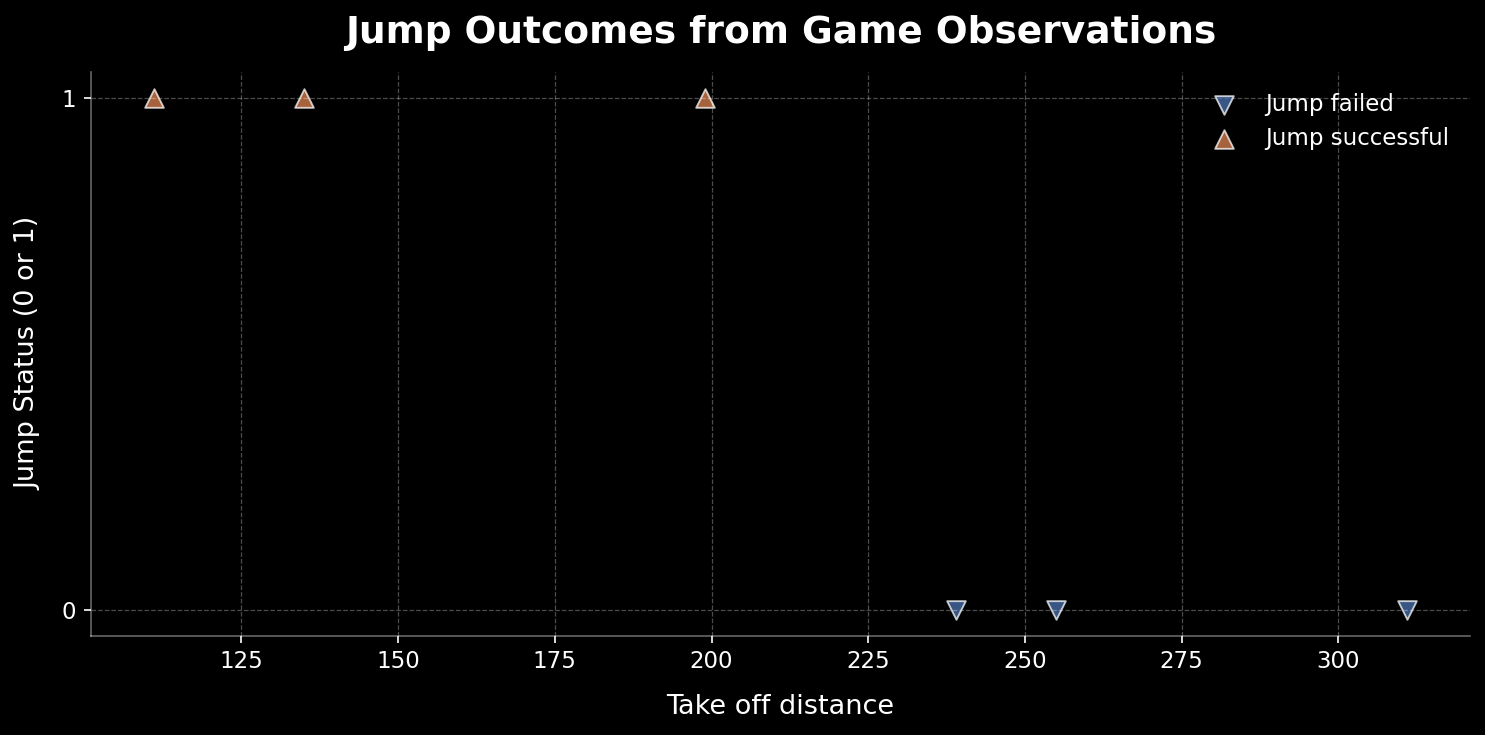

In [19]:
plot_binary_scatter(sample_observations)

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
X = observations[[take_off_distance]]
y = observations[jump_status]
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
w = model.coef_[0][0]
b = model.intercept_[0]

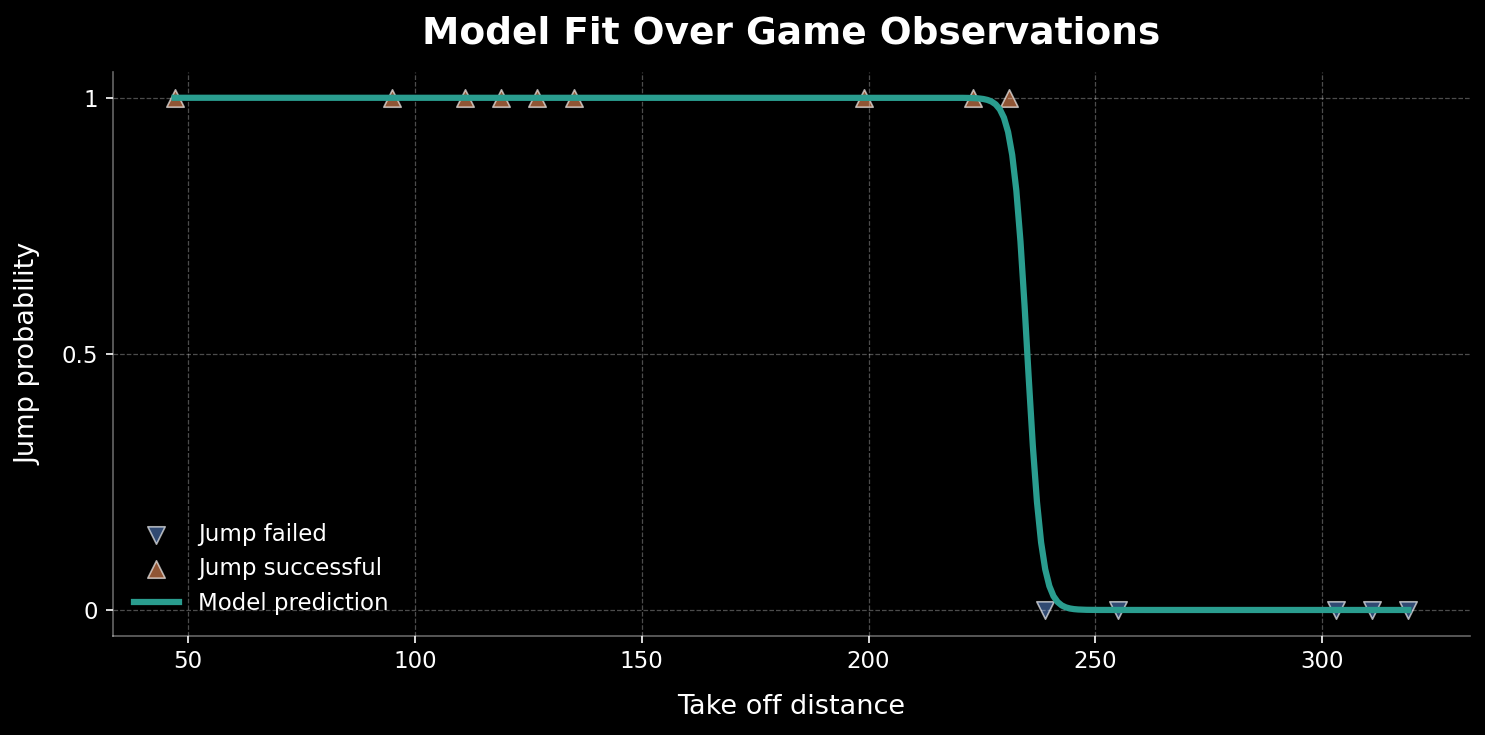

In [27]:
# Create a smooth x-range for the model line
x_min, x_max = observations[take_off_distance].min(), observations[take_off_distance].max()
x_line = np.linspace(x_min, x_max, 300)

# Logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Model prediction (probability)
y_prob = sigmoid(w * x_line + b)

# ---- Plot ----
plt.figure(figsize=(10, 5), dpi=150)

# Observations — Jump Failed (0)
plt.scatter(
    observations[observations[jump_status] == 0][take_off_distance],
    observations[observations[jump_status] == 0][jump_status],
    marker="v",
    s=70,
    color="#4C72B0",
    alpha=0.65,
    edgecolors="white",
    linewidth=0.8,
    label="Jump failed"
)

# Observations — Jump Successful (1)
plt.scatter(
    observations[observations[jump_status] == 1][take_off_distance],
    observations[observations[jump_status] == 1][jump_status],
    marker="^",
    s=70,
    color="#DD8452",
    alpha=0.65,
    edgecolors="white",
    linewidth=0.8,
    label="Jump successful"
)

# Logistic regression model line
plt.plot(
    x_line,
    y_prob,
    color="#2A9D8F",        # calm green for "model intuition"
    linewidth=3,
    label="Model prediction"
)

# Titles & labels
plt.title(
    "Model Fit Over Game Observations",
    fontsize=18,
    weight="bold",
    pad=14
)

plt.xlabel("Take off distance", fontsize=13, labelpad=10)
plt.ylabel("Jump probability", fontsize=13, labelpad=10)

# Y-axis formatting
plt.yticks([0, 0.5, 1], ["0", "0.5", "1"], fontsize=11)
plt.xticks(fontsize=11)

# Subtle grid
plt.grid(
    True,
    linestyle="--",
    linewidth=0.6,
    alpha=0.3
)

# Clean blog-style frame
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_alpha(0.4)
ax.spines["bottom"].set_alpha(0.4)

# Legend
plt.legend(frameon=False, fontsize=11, loc="lower left")

plt.tight_layout()
plt.show()
